In [81]:
import pandas as pd

url = "postgresql://localhost/test?user=postgres&password=248655"


def batch_load_sql(query: str) -> pd.DataFrame:
    CHUNKSIZE = 200000

    chunks = []
    for chunk_dataframe in pd.read_sql(query, url, chunksize=CHUNKSIZE):
        chunks.append(chunk_dataframe)
    return pd.concat(chunks, ignore_index=True)


data = batch_load_sql("""
SELECT co.visitor_token_id,  
	ctt.id AS ticket_type_id
FROM core_order co
JOIN core_orderitem coi ON coi.order_id = co.id
JOIN core_ticket ct ON ct.id=coi.ticket_id
JOIN core_tickettype ctt ON ctt.id=ct.ticket_type_id
WHERE co.visitor_token_id != '' 
    AND ctt.is_event=TRUE 
    AND co.shop_id=4 
    AND co.status=3""")
data

,visitor_token_id,ticket_type_id
0,92b098e46107fc8d3cf69729495c4e6f4ca81884,694
1,92b098e46107fc8d3cf69729495c4e6f4ca81884,684
2,92b098e46107fc8d3cf69729495c4e6f4ca81884,680
3,92b098e46107fc8d3cf69729495c4e6f4ca81884,644
4,21013dd5d078aac9c96620ab03e341ecaa37c146,819
...,...,...
42938,621238543b453b1270e95f2594eb8b199208293e,955
42939,341e54b5bc9189509a51370a61008dde7645d959,955
42940,c73a253380d0c21b5ffa9f109f3f49b0c68115e2,955
42941,ee1223e994f402a964dd757f0410148dd9c0a9ff,955


In [82]:
data['visitor_token_id'].nunique()

6142

In [83]:
events = pd.read_csv('Data/events.csv')
users = pd.read_csv('Data/users.csv')

In [84]:
events_tfidf = pd.read_csv('Data/events_tfidf.csv').set_index('ticket_type_id')
users_tfidf = pd.read_csv('Data/users_tfidf.csv').set_index('visitor_token_id')

events_tfidf.shape, users_tfidf.shape

((1035, 17), (38649, 10))

In [85]:
events_bert = pd.read_csv('Data/events_bert.csv').set_index('ticket_type_id')
users_bert = pd.read_csv('Data/users_bert.csv').set_index('visitor_token_id')

events_bert.shape, users_bert.shape

((1035, 27), (38649, 20))

In [97]:
import numpy as np

tfidf_data = (
    data
    .join(events_tfidf, how="inner", on="ticket_type_id")
    .join(users_tfidf, how="inner", on="visitor_token_id")
    .set_index('visitor_token_id')
)
tfidf_data['target'] = np.ones(tfidf_data.shape[0])

tfidf_data.head()

,ticket_type_id,name_d2c1,name_d2c2,name_d2c3,name_d2c4,name_d2c5,desc_d2c1,desc_d2c2,desc_d2c3,desc_d2c4,...,job_d2c2,job_d2c3,job_d2c4,job_d2c5,par_d2c1,par_d2c2,par_d2c3,par_d2c4,par_d2c5,target
visitor_token_id,,,,,,,,,,,,,,,,,,,,,
92b098e46107fc8d3cf69729495c4e6f4ca81884,694,-0.053913,-0.234504,-0.200406,-0.682708,-0.217252,0.798203,0.431733,-1.253734,0.321393,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,684,-0.854372,-0.850799,-0.863828,-0.543863,-0.532958,0.371813,0.225398,-0.539201,-0.135854,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,680,0.135156,0.354441,-2.152664,0.209005,-0.459491,0.252131,0.159530,-1.061695,-0.359100,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,644,-0.589285,-0.781067,-0.716684,-0.508389,-0.397580,-1.118513,-0.209853,0.253537,-0.376831,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
21013dd5d078aac9c96620ab03e341ecaa37c146,819,1.336295,1.101524,0.625990,1.175203,0.363811,-0.240443,-0.020800,0.422273,0.121554,...,-0.299506,-0.413816,-0.414564,-0.551328,0.681210,0.726510,1.155953,0.566569,-3.760195,1.0


In [98]:
bert_data = (
    data
    .join(events_bert, how="inner", on="ticket_type_id")
    .join(users_bert, how="inner", on="visitor_token_id")
    .set_index('visitor_token_id')
)
bert_data['target'] = np.ones(bert_data.shape[0])

bert_data.head()

,ticket_type_id,name_v1,name_v2,name_v3,name_v4,name_v5,name_v6,name_v7,name_v8,name_v9,...,par_2,par_3,par_4,par_5,par_6,par_7,par_8,par_9,par_10,target
visitor_token_id,,,,,,,,,,,,,,,,,,,,,
92b098e46107fc8d3cf69729495c4e6f4ca81884,694,-0.832374,-1.855123,-0.351247,-1.970325,-2.692699,-3.558699,-1.213246,0.291080,-0.822037,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,684,6.804832,0.198852,-1.525694,1.231025,0.416190,-3.473252,0.516987,1.012626,-0.873653,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,680,-1.327811,-0.808923,-0.571342,2.532118,0.088761,-0.036916,1.242285,-0.678138,0.228001,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,644,9.002142,-0.997031,1.864061,0.032507,-0.695105,2.139579,-0.881648,-1.969394,1.753322,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
21013dd5d078aac9c96620ab03e341ecaa37c146,819,0.197996,0.159836,-1.337033,-1.772050,1.328088,-0.361172,-0.193548,0.842201,-0.883503,...,-2.163474,-4.666859,-1.735883,3.452776,0.919903,3.096287,-1.028647,1.395694,0.691792,1.0


In [99]:
from tqdm import tqdm

n = 10

for token in tqdm(set(tfidf_data.index)):
    tfidf_sample = tfidf_data[tfidf_data.index != token].sample(n=n).reset_index(drop=True)
    user = users_tfidf[users_tfidf.index == token].reset_index(drop=True)

    tfidf_sample[user.columns] = user.to_numpy().repeat(n, axis=0)
    tfidf_sample.index = [token for _ in range(n)]
    tfidf_sample['target'] = 0

    tfidf_data = pd.concat([tfidf_data, tfidf_sample], axis=0)

model_tfidf_data = tfidf_data.drop_duplicates()
model_tfidf_data.to_csv('Data/model_tfidf.csv')

print(model_tfidf_data['target'].value_counts())
model_tfidf_data.head()

100%|██████████| 3093/3093 [00:49<00:00, 62.91it/s]


target
0.0    25344
1.0    15895
Name: count, dtype: int64


,ticket_type_id,name_d2c1,name_d2c2,name_d2c3,name_d2c4,name_d2c5,desc_d2c1,desc_d2c2,desc_d2c3,desc_d2c4,...,job_d2c2,job_d2c3,job_d2c4,job_d2c5,par_d2c1,par_d2c2,par_d2c3,par_d2c4,par_d2c5,target
92b098e46107fc8d3cf69729495c4e6f4ca81884,694,-0.053913,-0.234504,-0.200406,-0.682708,-0.217252,0.798203,0.431733,-1.253734,0.321393,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,684,-0.854372,-0.850799,-0.863828,-0.543863,-0.532958,0.371813,0.225398,-0.539201,-0.135854,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,680,0.135156,0.354441,-2.152664,0.209005,-0.459491,0.252131,0.159530,-1.061695,-0.359100,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,644,-0.589285,-0.781067,-0.716684,-0.508389,-0.397580,-1.118513,-0.209853,0.253537,-0.376831,...,-0.299506,-0.413816,-0.414564,-0.551328,0.637404,-3.152206,1.043217,0.562031,0.622847,1.0
21013dd5d078aac9c96620ab03e341ecaa37c146,819,1.336295,1.101524,0.625990,1.175203,0.363811,-0.240443,-0.020800,0.422273,0.121554,...,-0.299506,-0.413816,-0.414564,-0.551328,0.681210,0.726510,1.155953,0.566569,-3.760195,1.0


In [100]:
for token in tqdm(set(bert_data.index)):
    bert_sample = bert_data[bert_data.index != token].sample(n=n).reset_index(drop=True)
    user = users_bert[users_bert.index == token].reset_index(drop=True)

    bert_sample[user.columns] = user.to_numpy().repeat(n, axis=0)
    bert_sample.index = [token for _ in range(n)]
    bert_sample['target'] = 0

    bert_data = pd.concat([bert_data, bert_sample], axis=0)

model_bert_data = bert_data.drop_duplicates()
model_bert_data.to_csv('Data/model_bert.csv')

print(model_bert_data['target'].value_counts())
model_bert_data.head()

100%|██████████| 3093/3093 [01:20<00:00, 38.33it/s]


target
0.0    30524
1.0    19570
Name: count, dtype: int64


,ticket_type_id,name_v1,name_v2,name_v3,name_v4,name_v5,name_v6,name_v7,name_v8,name_v9,...,par_2,par_3,par_4,par_5,par_6,par_7,par_8,par_9,par_10,target
92b098e46107fc8d3cf69729495c4e6f4ca81884,694,-0.832374,-1.855123,-0.351247,-1.970325,-2.692699,-3.558699,-1.213246,0.291080,-0.822037,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,684,6.804832,0.198852,-1.525694,1.231025,0.416190,-3.473252,0.516987,1.012626,-0.873653,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,680,-1.327811,-0.808923,-0.571342,2.532118,0.088761,-0.036916,1.242285,-0.678138,0.228001,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
92b098e46107fc8d3cf69729495c4e6f4ca81884,644,9.002142,-0.997031,1.864061,0.032507,-0.695105,2.139579,-0.881648,-1.969394,1.753322,...,-2.597326,-0.018931,-4.285255,-3.345347,-2.098318,0.815640,-0.310054,-2.087216,0.695620,1.0
21013dd5d078aac9c96620ab03e341ecaa37c146,819,0.197996,0.159836,-1.337033,-1.772050,1.328088,-0.361172,-0.193548,0.842201,-0.883503,...,-2.163474,-4.666859,-1.735883,3.452776,0.919903,3.096287,-1.028647,1.395694,0.691792,1.0


In [125]:
from catboost import CatBoostClassifier

X_tfidf = model_tfidf_data.drop(columns=['target', 'ticket_type_id', 'time_year'])
y_tfidf = model_tfidf_data['target']

# tfidf_feature_weights = [1 if elem not in ['ohe_theme_coffee', 'ohe_theme_hotel', 'ohe_theme_restaurant']
#                    else 1 for elem in model_tfidf_data.columns.values]

tfidf_model = CatBoostClassifier(feature_weights=None)

tfidf_model.fit(X_tfidf, y_tfidf)

Learning rate set to 0.050428
0:	learn: 0.6843006	total: 15ms	remaining: 15s
1:	learn: 0.6766167	total: 25.3ms	remaining: 12.6s
2:	learn: 0.6696482	total: 37.8ms	remaining: 12.5s
3:	learn: 0.6654945	total: 49ms	remaining: 12.2s
4:	learn: 0.6608139	total: 60.6ms	remaining: 12.1s
5:	learn: 0.6555329	total: 72.4ms	remaining: 12s
6:	learn: 0.6512134	total: 83.6ms	remaining: 11.9s
7:	learn: 0.6475519	total: 96.3ms	remaining: 11.9s
8:	learn: 0.6437113	total: 108ms	remaining: 11.9s
9:	learn: 0.6401818	total: 135ms	remaining: 13.3s
10:	learn: 0.6370551	total: 145ms	remaining: 13.1s
11:	learn: 0.6342714	total: 155ms	remaining: 12.7s
12:	learn: 0.6319626	total: 165ms	remaining: 12.5s
13:	learn: 0.6283007	total: 174ms	remaining: 12.3s
14:	learn: 0.6250930	total: 184ms	remaining: 12.1s
15:	learn: 0.6232482	total: 194ms	remaining: 11.9s
16:	learn: 0.6211114	total: 204ms	remaining: 11.8s
17:	learn: 0.6194235	total: 214ms	remaining: 11.6s
18:	learn: 0.6174098	total: 224ms	remaining: 11.5s
19:	learn: 

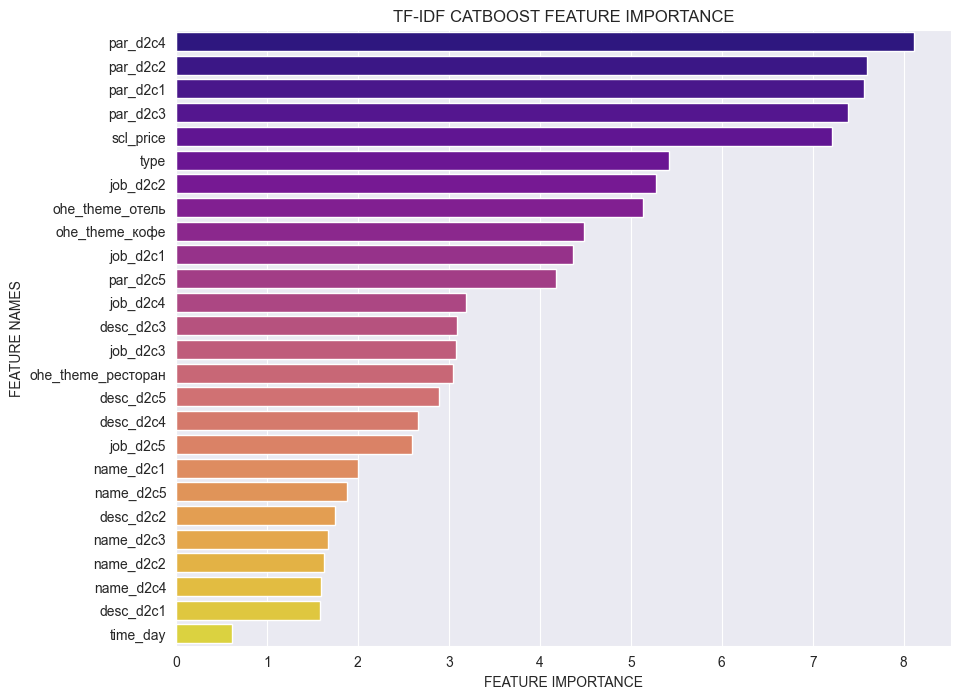

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_feature_importance(importance, names, model_type):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    plt.figure(figsize=(10, 8))

    palette = sns.color_palette('plasma', len(fi_df))
    sns.barplot(x=fi_df['feature_importance'],
                y=fi_df['feature_names'],
                palette=palette,
                hue=fi_df['feature_names'],
                legend=False)

    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(tfidf_model.feature_importances_, X_tfidf.columns, 'TF-IDF CATBOOST')

In [127]:
X_bert = model_bert_data.drop(columns=['target', 'ticket_type_id', 'time_year'])
y_bert = model_bert_data['target']

# bert_feature_weights = [1 if elem not in ['ohe_theme_coffee', 'ohe_theme_hotel', 'ohe_theme_restaurant']
#                    else 1 for elem in model_tfidf_data.columns.values]

bert_model = CatBoostClassifier(feature_weights=None)

bert_model.fit(X_bert, y_bert)

Learning rate set to 0.054795
0:	learn: 0.6849877	total: 28.5ms	remaining: 28.4s
1:	learn: 0.6780737	total: 41.7ms	remaining: 20.8s
2:	learn: 0.6716536	total: 55.3ms	remaining: 18.4s
3:	learn: 0.6660090	total: 68.4ms	remaining: 17s
4:	learn: 0.6609744	total: 81.1ms	remaining: 16.1s
5:	learn: 0.6559876	total: 93.6ms	remaining: 15.5s
6:	learn: 0.6520904	total: 105ms	remaining: 15s
7:	learn: 0.6469275	total: 118ms	remaining: 14.6s
8:	learn: 0.6432261	total: 131ms	remaining: 14.4s
9:	learn: 0.6387681	total: 143ms	remaining: 14.2s
10:	learn: 0.6356623	total: 156ms	remaining: 14s
11:	learn: 0.6328200	total: 168ms	remaining: 13.9s
12:	learn: 0.6301932	total: 183ms	remaining: 13.9s
13:	learn: 0.6276738	total: 196ms	remaining: 13.8s
14:	learn: 0.6251409	total: 209ms	remaining: 13.7s
15:	learn: 0.6229997	total: 222ms	remaining: 13.7s
16:	learn: 0.6196031	total: 237ms	remaining: 13.7s
17:	learn: 0.6181274	total: 250ms	remaining: 13.6s
18:	learn: 0.6162934	total: 264ms	remaining: 13.6s
19:	learn: 

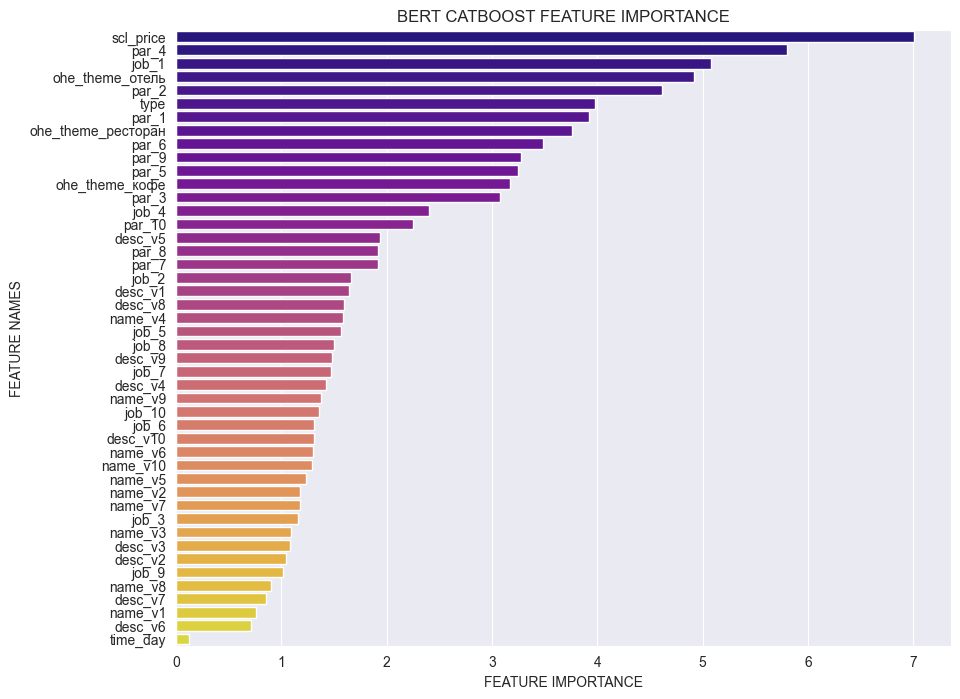

In [128]:
plot_feature_importance(bert_model.feature_importances_, X_bert.columns, 'BERT CATBOOST')

In [144]:
from datetime import datetime


def get_predictions(token: str):
    current_year = datetime.now().year
    current_date = datetime.now().year

    # TODO добавить фильтрацию по дате и по уже приобретенным мероприятиям

    tmp_tfidf = (model_tfidf_data[(model_tfidf_data.index != token) &
                                  (model_tfidf_data['time_year'] == current_year)]
                 .drop(columns=['target', 'time_year'])
                 .drop_duplicates(subset=['ticket_type_id'])
                 .reset_index(drop=True))

    tmp_bert = (model_bert_data[(model_bert_data.index != token) &
                                (model_bert_data['time_year'] == current_year)]
                .drop(columns=['target', 'time_year'])
                .drop_duplicates(subset=['ticket_type_id'])
                .reset_index(drop=True))

    tfidf_tt_ids = tmp_tfidf['ticket_type_id']
    tfidf_bert_ids = tmp_bert['ticket_type_id']

    tmp_df = tmp_tfidf.drop(columns=['ticket_type_id'])
    tmp_bert = tmp_bert.drop(columns=['ticket_type_id'])

    tfidf_user = users_tfidf[users_tfidf.index == token]
    bert_user = users_bert[users_bert.index == token]

    tmp_tfidf[tfidf_user.columns] = tfidf_user.to_numpy().repeat(len(tmp_df), axis=0)
    tmp_bert[bert_user.columns] = bert_user.to_numpy().repeat(len(tmp_df), axis=0)

    tfidf_result = tfidf_model.predict_proba(tmp_tfidf)
    bert_result = bert_model.predict_proba(tmp_bert)

    top_5_tfidf = (tfidf_tt_ids[np.argsort(tfidf_result[:, 1])[-5:]]
                   .rename('tfidf_res')
                   .reset_index(drop=True))

    top_5_bert = (tfidf_bert_ids[np.argsort(bert_result[:, 1])[-5:]]
                  .rename('bert_res')
                  .reset_index(drop=True))

    return pd.concat([top_5_tfidf, top_5_bert], axis=1)


get_predictions(token='00118eb6a43084bcad094594229c239237683c97')

,tfidf_res,bert_res
0,1038,1167
1,963,963
2,927,1128
3,934,966
4,1128,937


In [151]:
users

,visitor_token_id,job,params
0,0000b08340cc86c7a61cc3251fbf2544c6472dda,бариста наставник,NaN
1,0004214be6142004e5dfae0c869f7648c33e3640,менеджер по работе с ключевыми клиентами,NaN
2,00099e4722876bce6828a4d083f59d9bc80284d1,NaN,ресторан кафе продукты питания и напитки
3,000aa3c29eee38748aa67148ec80f8754f27017f,NaN,кулинарная студия
4,000cf2d412eb10cae69abe61b606e8be3063d9ba,NaN,ресторан кафе ресторан кафе
...,...,...,...
38644,fff47c137b2ba6a66e4670fe3701f3088682b86e,су шеф кондитер,городской отель изучение рынка знакомство с но...
38645,fff5ecf120366e7a9982e7e01666f84280478336,NaN,NaN
38646,fff6302be5388f9160e86cb11a6be2cf487a1c5b,founder,кофейня общение с коллегами установление новых...
38647,fff676d8522543716287e474ed6eebe50db360ab,генеральный директор,изучение рынка знакомство с новинками получени...


In [157]:
events[events['ticket_type_id'].isin(
    get_predictions(token='0053ba113ba3e92a3a4c89b774260fa632cf34dd').iloc[:, 0]
)]

,name,description,time_start,ticket_type_id,price,type_name,theme
797,эволюция корпоративного гостя как отелям и ота...,тенденции в предпочтениях корпоративных гостей...,2024-10-22 07:30:00+00:00,1179,0.0,экспертная сессия,отель
877,закупка мебели в отель формула эффективности,в ходе сессии производители всей ассортиментно...,2024-10-23 10:30:00+00:00,1175,0.0,экспертная сессия,отель
1003,искусственный интеллект на службе у отельеров,быстро развивающиеся технологии искусственного...,2024-10-21 12:50:00+00:00,1169,0.0,экспертная сессия,отель
1006,где девелоперы и инвесторы теряют деньги дорог...,обсудим br как выбрать правильного профессиона...,2024-10-23 07:30:00+00:00,1142,0.0,экспертная сессия,отель
1016,цифровизация кухни и шведской линии шанс закры...,представьте что вы можете сократить затраты на...,2024-10-22 13:20:00+00:00,1140,0.0,экспертная сессия,отель


In [159]:
events[events['ticket_type_id'].isin(
    get_predictions(token='0053ba113ba3e92a3a4c89b774260fa632cf34dd').iloc[:, 1]
)]

,name,description,time_start,ticket_type_id,price,type_name,theme
826,стратегии старта и роста в оздоровительном тур...,модератор михаил данилов br основные темы сесс...,2024-10-21 09:30:00+00:00,966,2700.0,кейс сессия,отель
877,закупка мебели в отель формула эффективности,в ходе сессии производители всей ассортиментно...,2024-10-23 10:30:00+00:00,1175,0.0,экспертная сессия,отель
905,минимум кадров максимум эффективности операцио...,в условиях нехватки квалифицированных кадров н...,2024-10-21 11:30:00+00:00,935,2700.0,тренинг,отель
912,конференция успешный глэмпинг без ошибок учимс...,соорганизатор ассоциация глэмпингов россии br ...,2024-10-23 07:10:00+00:00,985,9500.0,конференция,отель
999,увеличение прибыли и загрузки объекта с помощь...,на лекции практикуме спикеры подробно обсудят ...,2024-10-22 10:00:00+00:00,932,2700.0,семинар практикум,отель
